In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [19]:
df=pd.read_csv('data/benin-malanville.csv')

In [20]:
#descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GHI,525600.0,240.559452,331.131327,-12.9,-2.0,1.8,483.4,1413.0
DNI,525600.0,167.187516,261.710501,-7.8,-0.5,-0.1,314.2,952.3
DHI,525600.0,115.358961,158.691074,-12.6,-2.1,1.6,216.3,759.2
ModA,525600.0,236.589496,326.894859,0.0,0.0,4.5,463.7,1342.3
ModB,525600.0,228.883576,316.536515,0.0,0.0,4.3,447.9,1342.3
Tamb,525600.0,28.179683,5.924297,11.0,24.2,28.0,32.3,43.8
RH,525600.0,54.487969,28.073069,2.1,28.8,55.1,80.1,100.0
WS,525600.0,2.121113,1.603466,0.0,1.0,1.9,3.1,19.5
WSgust,525600.0,2.809195,2.029120,0.0,1.3,2.6,4.1,26.6
WSstdev,525600.0,0.473390,0.273395,0.0,0.4,0.5,0.6,4.2


In [21]:
df.describe(include='object')

,Timestamp
count,525600
unique,525600
top,2021-08-09 00:01
freq,1


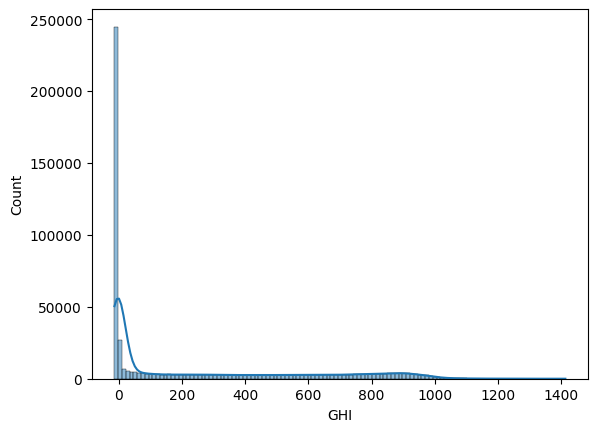

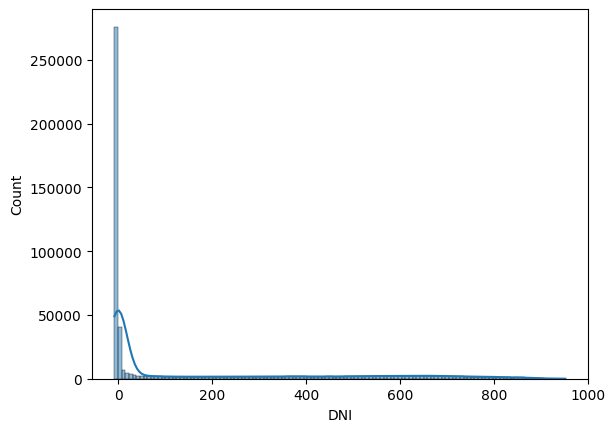

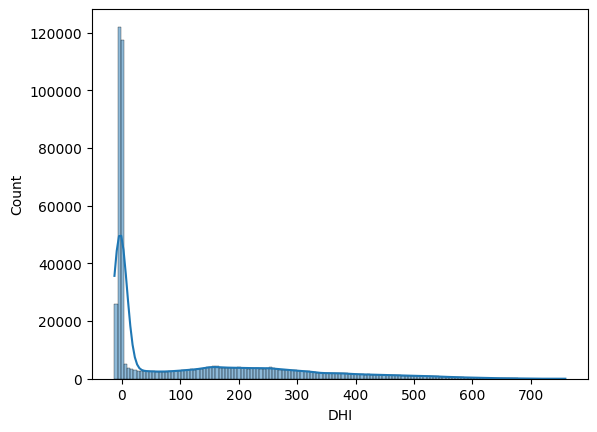

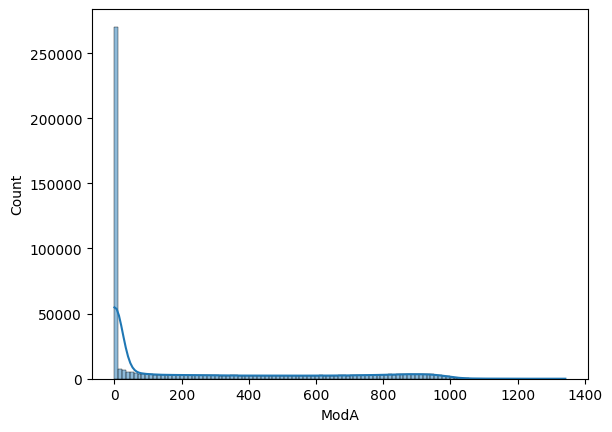

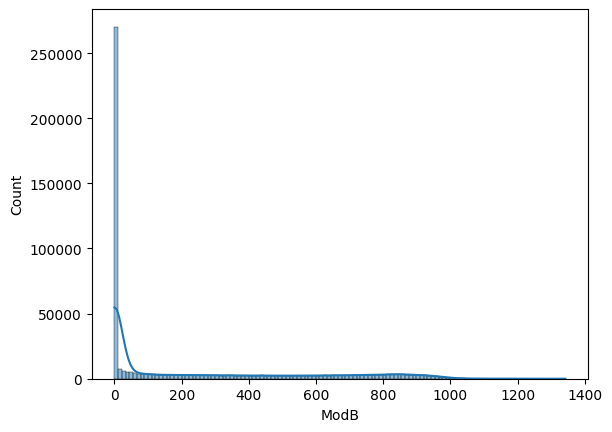

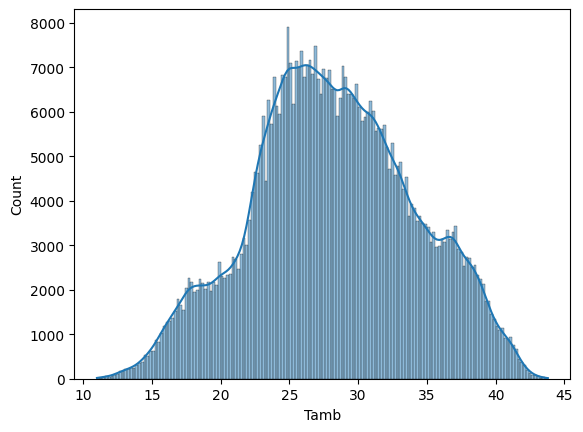

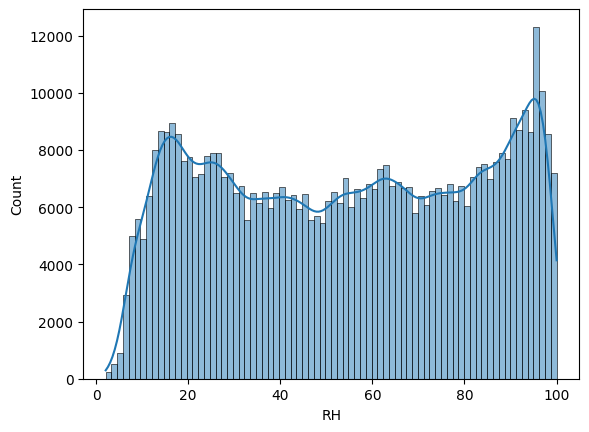

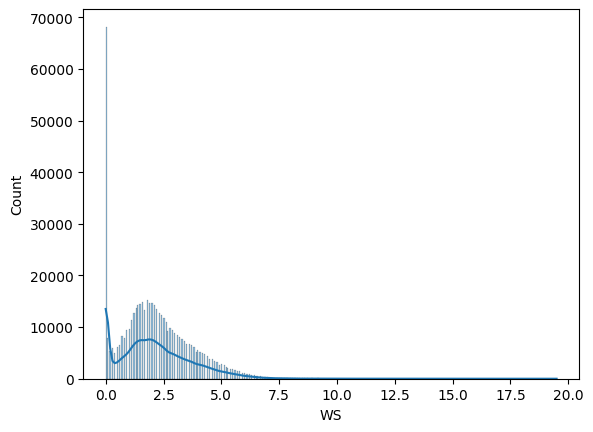

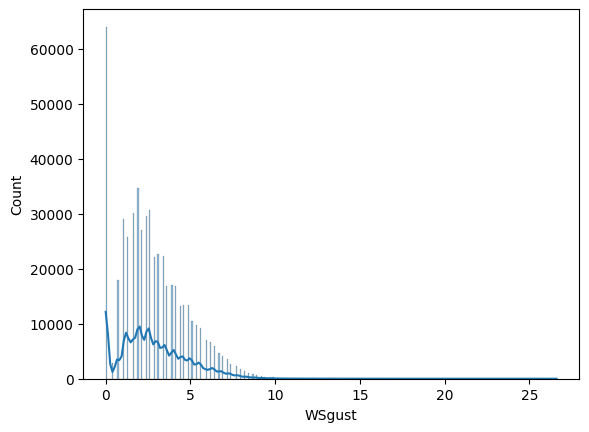

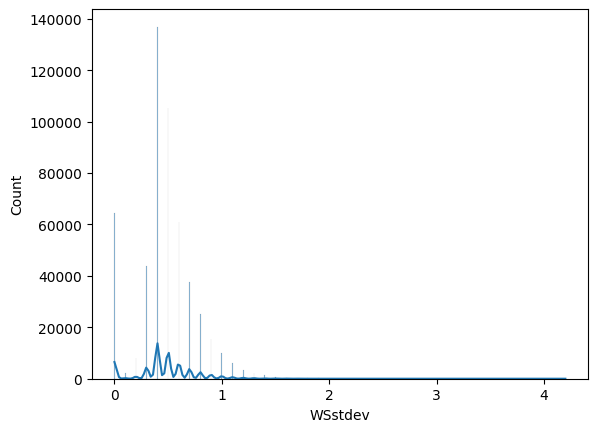

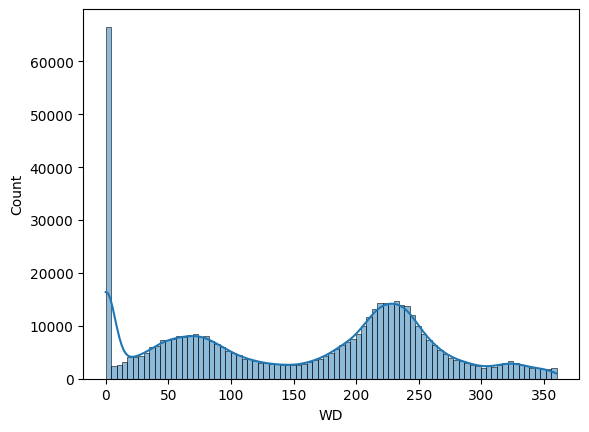

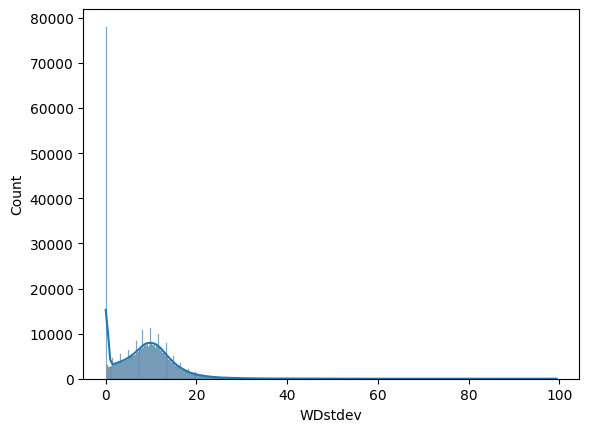

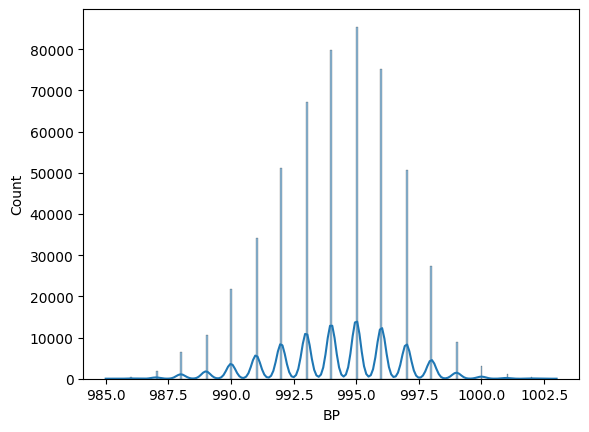

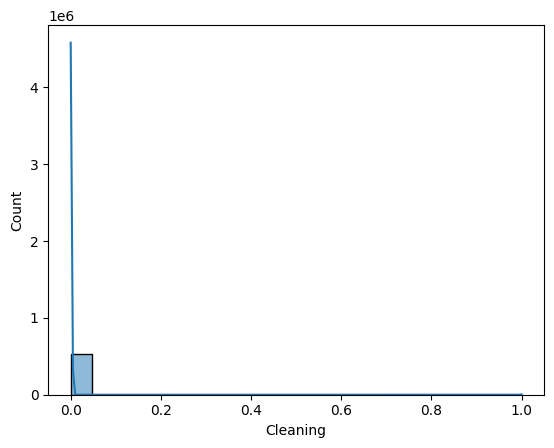

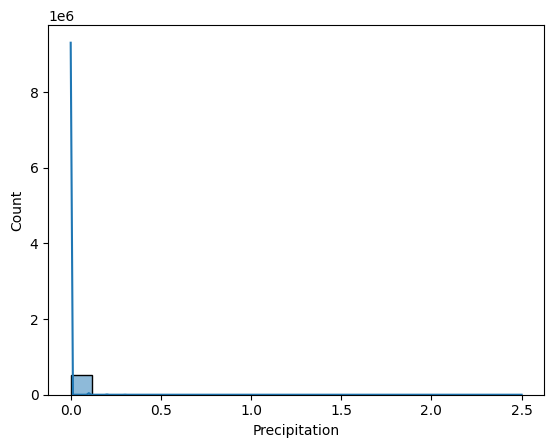

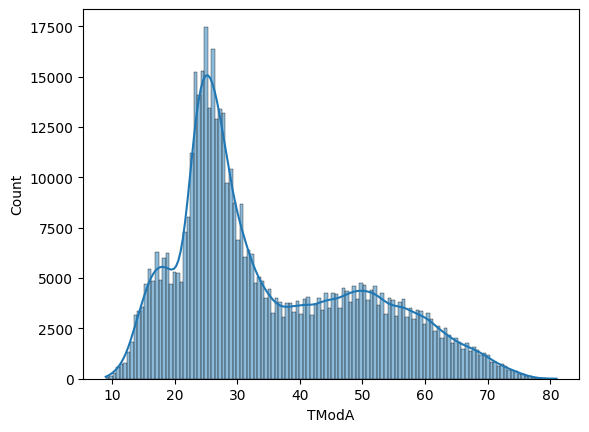

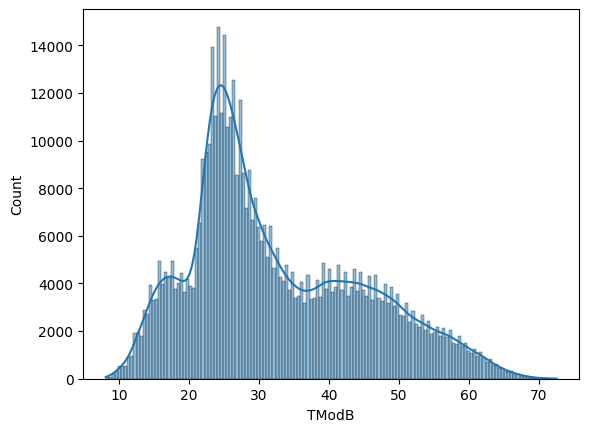

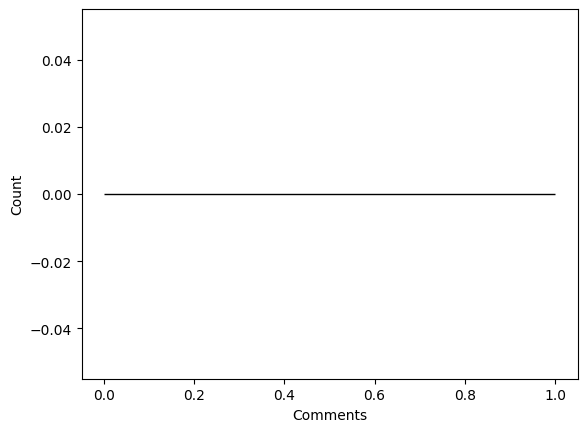

In [22]:
for i in df.select_dtypes(include='number').columns:
    sns.histplot(data=df, x=i, kde=True)
    plt.show()

In [23]:
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
print("Numeric Columns:")
print(numeric_cols)

Numeric Columns:
        GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  WSstdev     WD  \
0      -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4      0.1  122.1   
1      -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0      0.0    0.0   
2      -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1      0.5  124.6   
3      -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7      0.4  120.3   
4      -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7      0.3  113.2   
...     ...  ...  ...   ...   ...   ...   ...  ...     ...      ...    ...   
525595 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1      0.5  119.3   
525596 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7      0.4  115.2   
525597 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1      0.5  129.8   
525598 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3      0.5  124.4   
525599 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6      0.3  124.1   

        WDstdev   BP  Cleaning  Precipitation 

Outliners

In [25]:
# Calculate z-score for numeric columns
z_scores = stats.zscore(df[['GHI', 'DNI', 'DHI']])
threshold = 3
outliers = df[(z_scores > threshold).any(axis=1)]
print("Outliers:\n", outliers)


Outliers:
                Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
670     2021-08-09 11:11   836.0  235.0  610.6   778.8   783.8  30.3  68.2   
671     2021-08-09 11:12  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6   
672     2021-08-09 11:13   938.0  340.1  612.8   891.1   891.1  30.4  68.4   
673     2021-08-09 11:14   718.5  126.8  593.2   682.6   682.6  30.6  68.2   
674     2021-08-09 11:15  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1   
...                  ...     ...    ...    ...     ...     ...   ...   ...   
524896  2022-08-08 12:17   933.0  321.6  604.2   873.0   869.0  30.5  73.5   
524900  2022-08-08 12:21   829.0  228.3  591.5   776.2   771.9  30.5  73.1   
524901  2022-08-08 12:22   831.0  225.8  596.1   773.8   770.2  30.5  73.0   
524916  2022-08-08 12:37   796.9  188.7  599.5   750.3   747.6  30.3  72.5   
524917  2022-08-08 12:38   743.9  143.3  593.2   703.0   700.9  30.3  72.9   

         WS  WSgust  WSstdev     WD  WDstdev   BP  C

In [26]:
# Check for negative values in specified columns
negative_values = df[(df['GHI'] < 0) | (df['DNI'] < 0) | (df['DHI'] < 0)]
print("Rows with Negative Values:\n", negative_values)

Rows with Negative Values:
                Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1       2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2       2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3       2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4       2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-08-08 23:56 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1   
525596  2022-08-08 23:57 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7   
525597  2022-08-08 23:58 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1   
525598  2022-08-08 23:59 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3   
525599  2022-08-09 00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6   

        WSs

Correlation Analysis

In [27]:
df[['GHI', 'DHI', 'DNI', 'TModA', 'TModB']].corr()

,GHI,DHI,DNI,TModA,TModB
GHI,1.000000,0.849989,0.882376,0.920127,0.874338
DHI,0.849989,1.000000,0.546602,0.825012,0.777829
DNI,0.882376,0.546602,1.000000,0.790340,0.756007
TModA,0.920127,0.825012,0.790340,1.000000,0.983443
TModB,0.874338,0.777829,0.756007,0.983443,1.000000


<Axes: >

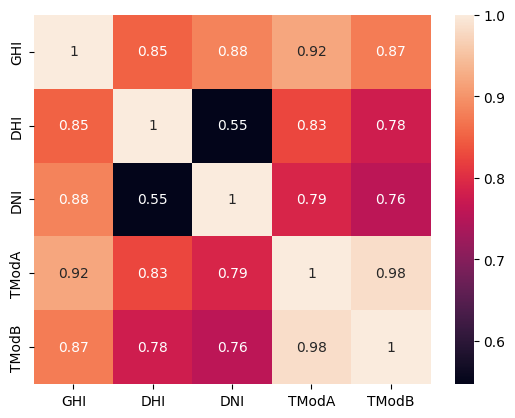

In [28]:
sns.heatmap(df[['GHI', 'DHI', 'DNI', 'TModA', 'TModB']].corr(), annot=True)